# 판다스 데이터 분석
## 데이터 프레임 합치기
판다스의 concat() 함수는 데이터프레임(DataFrame) 또는 시리즈(Series)를 이어붙이는 기능을 제공합니다. 여기서 이어붙인다는 것은 주로 두 가지 방법으로 이루어집니다: 축을 따라 데이터를 결합하거나, 여러 데이터프레임의 유형을 결합하는 것입니다.

In [2]:
import pandas as pd

df1 = pd.read_csv("data/concat_1.csv")
df2 = pd.read_csv("data/concat_2.csv")
df3 = pd.read_csv("data/concat_3.csv")


In [9]:
result = pd.concat([df1,df2,df3], ignore_index=True)
result

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
4,a4,b4,c4,d4
5,a5,b5,c5,d5
6,a6,b6,c6,d6
7,a7,b7,c7,d7
8,a8,b8,c8,d8
9,a9,b9,c9,d9


In [11]:
pd.concat([df1,df2,df3], axis=1, ignore_index=True)

,0,1,2,3,4,5,6,7,8,9,10,11
0,a0,b0,c0,d0,a4,b4,c4,d4,a8,b8,c8,d8
1,a1,b1,c1,d1,a5,b5,c5,d5,a9,b9,c9,d9
2,a2,b2,c2,d2,a6,b6,c6,d6,a10,b10,c10,d10
3,a3,b3,c3,d3,a7,b7,c7,d7,a11,b11,c11,d11


## 스마트하게 데이터 프레임 합치기
판다스의 merge() 함수는 SQL의 JOIN 연산과 비슷한 방식으로 두 개의 데이터프레임(DataFrame)을 합치는데 사용됩니다. 이 함수는 주로 공통 열 또는 인덱스를 기준으로 두 데이터프레임을 합칩니다.

In [33]:
#날씨정보
person = pd.read_csv("data/person.csv")
site = pd.read_csv("data/site.csv")
survey = pd.read_csv("data/survey.csv")
visited = pd.read_csv("data/visited.csv")

In [34]:
site

,name,lat,long
0,DR-1,-49.85,-128.57
1,DR-3,-47.15,-126.72
2,MSK-4,-48.87,-123.40


In [35]:
result = visited.merge(site, left_on='site', right_on='name')
del result['name']
result

,ident,site,dated,lat,long
0,619,DR-1,1927-02-08,-49.85,-128.57
1,622,DR-1,1927-02-10,-49.85,-128.57
2,844,DR-1,1932-03-22,-49.85,-128.57
3,734,DR-3,1939-01-07,-47.15,-126.72
4,735,DR-3,1930-01-12,-47.15,-126.72
5,751,DR-3,1930-02-26,-47.15,-126.72
6,752,DR-3,NaN,-47.15,-126.72
7,837,MSK-4,1932-01-14,-48.87,-123.40


In [39]:
# 1. person, survey
# 2. visited, survey

result = person.merge(survey, left_on='ident', right_on='person')
result

,ident,personal,family,taken,person,quant,reading
0,dyer,William,Dyer,619,dyer,rad,9.82
1,dyer,William,Dyer,619,dyer,sal,0.13
2,dyer,William,Dyer,622,dyer,rad,7.80
3,dyer,William,Dyer,622,dyer,sal,0.09
4,pb,Frank,Pabodie,734,pb,rad,8.41
5,pb,Frank,Pabodie,734,pb,temp,-21.50
6,pb,Frank,Pabodie,735,pb,rad,7.22
7,pb,Frank,Pabodie,751,pb,rad,4.35
8,pb,Frank,Pabodie,751,pb,temp,-18.50
9,lake,Anderson,Lake,734,lake,sal,0.05


In [40]:
visited

,ident,site,dated
0,619,DR-1,1927-02-08
1,622,DR-1,1927-02-10
2,734,DR-3,1939-01-07
3,735,DR-3,1930-01-12
4,751,DR-3,1930-02-26
5,752,DR-3,NaN
6,837,MSK-4,1932-01-14
7,844,DR-1,1932-03-22


In [41]:
survey

,taken,person,quant,reading
0,619,dyer,rad,9.82
1,619,dyer,sal,0.13
2,622,dyer,rad,7.80
3,622,dyer,sal,0.09
4,734,pb,rad,8.41
5,734,lake,sal,0.05
6,734,pb,temp,-21.50
7,735,pb,rad,7.22
8,735,NaN,sal,0.06
9,735,NaN,temp,-26.00


In [44]:
result = visited.merge(survey, left_on='ident', right_on='taken')
result

,ident,site,dated,taken,person,quant,reading
0,619,DR-1,1927-02-08,619,dyer,rad,9.82
1,619,DR-1,1927-02-08,619,dyer,sal,0.13
2,622,DR-1,1927-02-10,622,dyer,rad,7.80
3,622,DR-1,1927-02-10,622,dyer,sal,0.09
4,734,DR-3,1939-01-07,734,pb,rad,8.41
5,734,DR-3,1939-01-07,734,lake,sal,0.05
6,734,DR-3,1939-01-07,734,pb,temp,-21.50
7,735,DR-3,1930-01-12,735,pb,rad,7.22
8,735,DR-3,1930-01-12,735,NaN,sal,0.06
9,735,DR-3,1930-01-12,735,NaN,temp,-26.00


## 열을 행으로 내리기
melt 함수는 Pandas 데이터 프레임의 형태를 변경하는 데 사용되는 기능 중 하나입니다. 이 함수는 주로 "wide" 형식의 데이터를 "long" 형식으로 변환할 때 사용됩니다. 즉, 여러 열의 데이터를 단일 열로 조합하여 데이터를 '길게' 만들 수 있습니다.

In [47]:
#billboard.csv // 미국 음악 레이팅 점수

pew = pd.read_csv("data/pew.csv")
pew2 = pd.melt(pew, id_vars='religion', var_name="income",value_name='count')
pew2

,religion,income,count
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
175,Orthodox,Don't know/refused,73
176,Other Christian,Don't know/refused,18
177,Other Faiths,Don't know/refused,71
178,Other World Religions,Don't know/refused,8


In [67]:
billboard = pd.read_csv("data/billboard.csv")
billboard

,year,artist,track,time,date.entered,wk1,wk2,wk3,wk4,wk5,...,wk67,wk68,wk69,wk70,wk71,wk72,wk73,wk74,wk75,wk76
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,87,82.0,72.0,77.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,91,87.0,92.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,81,70.0,68.0,67.0,66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,3 Doors Down,Loser,4:24,2000-10-21,76,76.0,72.0,69.0,67.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,57,34.0,25.0,17.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,2000,Yankee Grey,Another Nine Minutes,3:10,2000-04-29,86,83.0,77.0,74.0,83.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
313,2000,"Yearwood, Trisha",Real Live Woman,3:55,2000-04-01,85,83.0,83.0,82.0,81.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
314,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18,95,94.0,91.0,85.0,84.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
315,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,99,99.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
billboard2 = pd.melt(billboard, id_vars = ['year','artist','track','time','date.entered'], var_name="week",value_name='rating')
billboard2

,year,artist,track,time,date.entered,week,rating
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,wk1,91.0
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,wk1,81.0
3,2000,3 Doors Down,Loser,4:24,2000-10-21,wk1,76.0
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,wk1,57.0
...,...,...,...,...,...,...,...
24087,2000,Yankee Grey,Another Nine Minutes,3:10,2000-04-29,wk76,NaN
24088,2000,"Yearwood, Trisha",Real Live Woman,3:55,2000-04-01,wk76,NaN
24089,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18,wk76,NaN
24090,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,wk76,NaN


In [95]:
#country_timeseries.csv //에볼라 바이러스(국가별 생존자/사망자 수)
ebola = pd.read_csv('data/country_timeseries.csv')
ebola.head()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN


In [97]:
ebola2 = pd.melt(ebola, id_vars = ['Date','Day'])
ebola2.head()


,Date,Day,variable,value
0,1/5/2015,289,Cases_Guinea,2776.0
1,1/4/2015,288,Cases_Guinea,2775.0
2,1/3/2015,287,Cases_Guinea,2769.0
3,1/2/2015,286,Cases_Guinea,NaN
4,12/31/2014,284,Cases_Guinea,2730.0


In [107]:
ebola2["State"]=ebola2['variable'].str.split('_').str[0]
ebola2["Country"]=ebola2['variable'].str.split('_').str[0]

del ebola2['variable']

ebola2[['Date','Day','State','Country','value']]


,Date,Day,State,Country,value
0,1/5/2015,289,Cases,Cases,2776.0
1,1/4/2015,288,Cases,Cases,2775.0
2,1/3/2015,287,Cases,Cases,2769.0
3,1/2/2015,286,Cases,Cases,NaN
4,12/31/2014,284,Cases,Cases,2730.0
...,...,...,...,...,...
1947,3/27/2014,5,Deaths,Deaths,NaN
1948,3/26/2014,4,Deaths,Deaths,NaN
1949,3/25/2014,3,Deaths,Deaths,NaN
1950,3/24/2014,2,Deaths,Deaths,NaN


In [110]:
#weather.csv //최고온도, 최저온도 수집

weather = pd.read_csv("data/weather.csv")
weather.head()

,id,year,month,element,d1,d2,d3,d4,d5,d6,...,d22,d23,d24,d25,d26,d27,d28,d29,d30,d31
0,MX17004,2010,1,tmax,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.8,NaN
1,MX17004,2010,1,tmin,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.5,NaN
2,MX17004,2010,2,tmax,NaN,27.3,24.1,NaN,NaN,NaN,...,NaN,29.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MX17004,2010,2,tmin,NaN,14.4,14.4,NaN,NaN,NaN,...,NaN,10.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MX17004,2010,3,tmax,NaN,NaN,NaN,NaN,32.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [116]:
weather2 = pd.melt(weather, id_vars = ['id','year','month','element'], var_name='day',value_name='temp')
weather2

,id,year,month,element,day,temp
0,MX17004,2010,1,tmax,d1,NaN
1,MX17004,2010,1,tmin,d1,NaN
2,MX17004,2010,2,tmax,d1,NaN
3,MX17004,2010,2,tmin,d1,NaN
4,MX17004,2010,3,tmax,d1,NaN
...,...,...,...,...,...,...
677,MX17004,2010,10,tmin,d31,NaN
678,MX17004,2010,11,tmax,d31,NaN
679,MX17004,2010,11,tmin,d31,NaN
680,MX17004,2010,12,tmax,d31,NaN


In [ ]:
* pivot_table : 내가 원하는 행과 열을 설정해서 집계값
* crosstab : 내가 원하는 행과 열을 설정해서 빈도수

<Axes: xlabel='element', ylabel='month'>

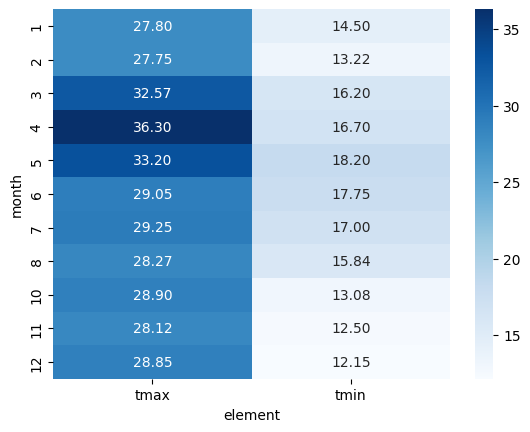

In [125]:
# 월별 최고온도, 최저온도에 대한 평균값

# 행 : month, 열: element, 값: temp, 집계값: 평균


import seaborn as sns

result = weather2.pivot_table(index='month',
                              columns = 'element',
                              values='temp',
                              aggfunc='mean')
sns.heatmap(result, annot=True,fmt='.2f', cmap='Blues')